In [3]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
import pandas as pd
from harmonypy import run_harmony

In [ ]:
# df_marker = pd.read_excel("/data2st1/junyi/output/atac0416/20250423maker list.xlsx")

In [ ]:
# df_marker

region Neurotransmitter_celltype           celltype.L1      celltype.L2  \
0       HY             Glutamatergic  Glutamatergic Neuron     HY Sv2b Glut   
1       HY                 GABAergic      GABAergic Neuron     HY Agrp GABA   
2       HY             Histaminergic  Histaminergic Neuron          HY Hist   
3       HY                 GABAergic      GABAergic Neuron   HY Bcl11b GABA   
4       HY                 GABAergic      GABAergic Neuron    HY Grik3 GABA   
..     ...                       ...                   ...              ...   
126    NaN                       NaN            Astro-Epen   Astro-Gfaphigh   
127    NaN                       NaN                Immune        Microglia   
128    NaN                       NaN                Immune              PVM   
129    NaN                       NaN              Vascular         Pericyte   
130    NaN                       NaN            Astro-Epen  Hypendymal cell   

           marker  
0            Sv2b  
1            Agrp  
2             Hdc  
3          Bcl11b  
4           Grik3  
..            ...  
126     Aqp4 Gfap  
127  Cx3cr1 Dock8  
128          Mrc1  
129         Kcnj8  
130          Sspo  

[131 rows x 5 columns]

In [2]:
regions = ["HIP","AMY","PFC"]
celltypes = [
# 'Astro-Epen',
# 'Immune',
'Neuron',
'NN'
# 'OPC-Oligo',
# 'Vascular'
]

File ATACSC_HIP_Neuron_L2annoated.h5ad already exists, skipping...


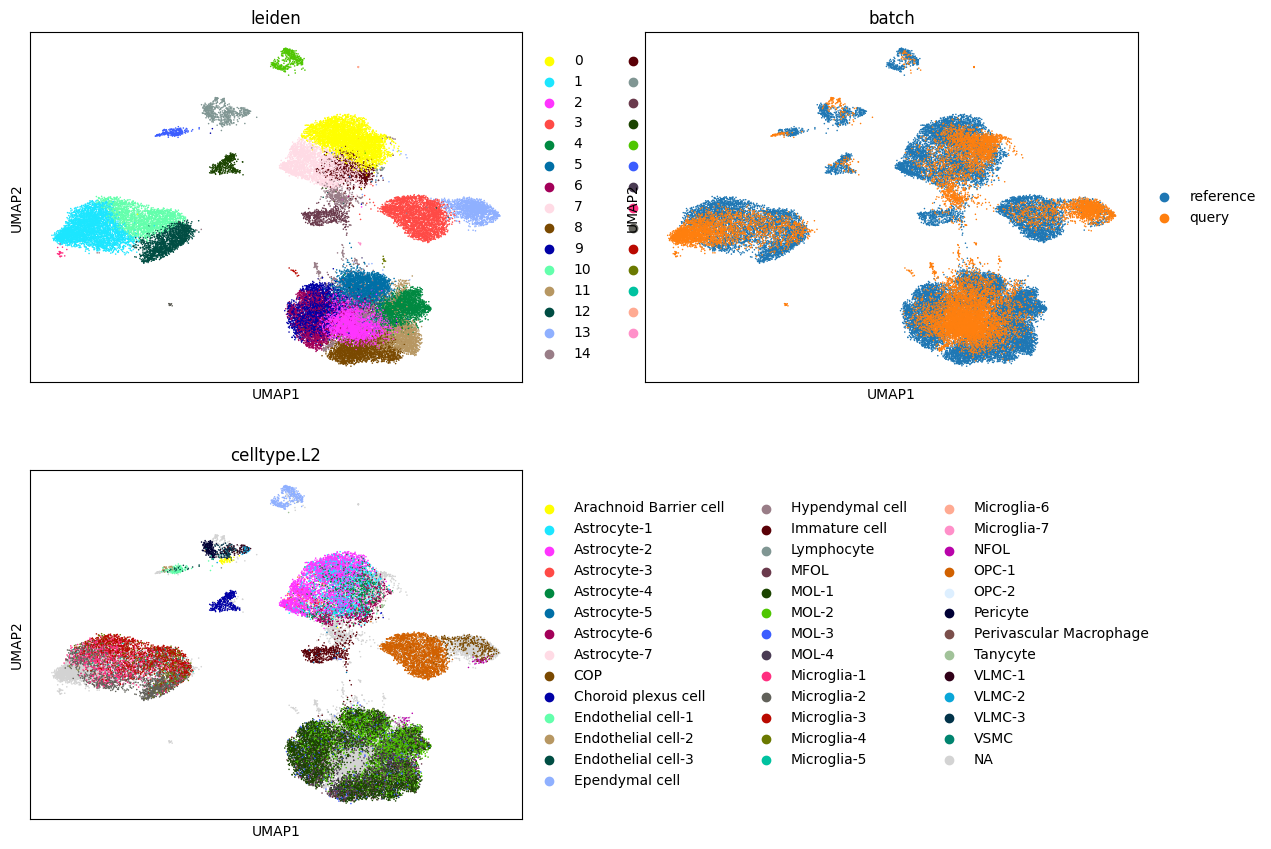

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


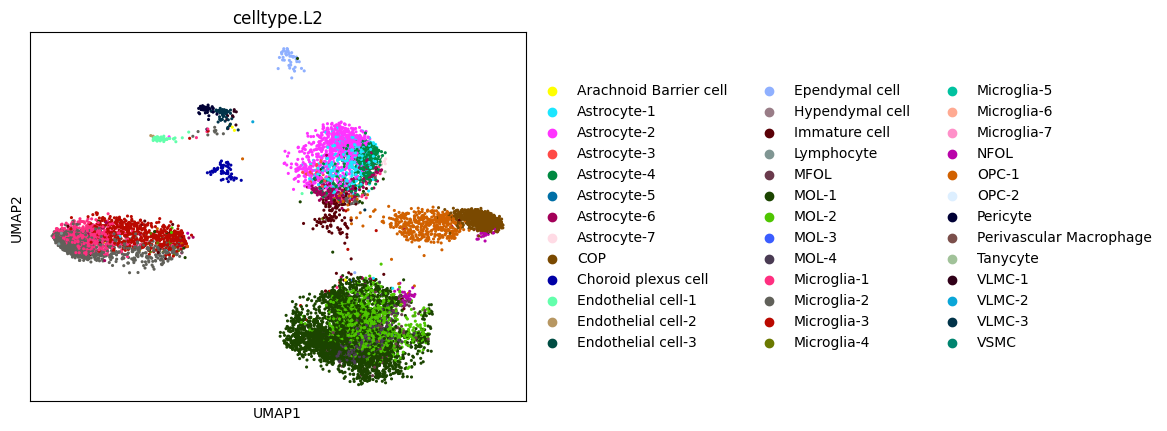

File ATACSC_AMY_Neuron_L2annoated.h5ad already exists, skipping...


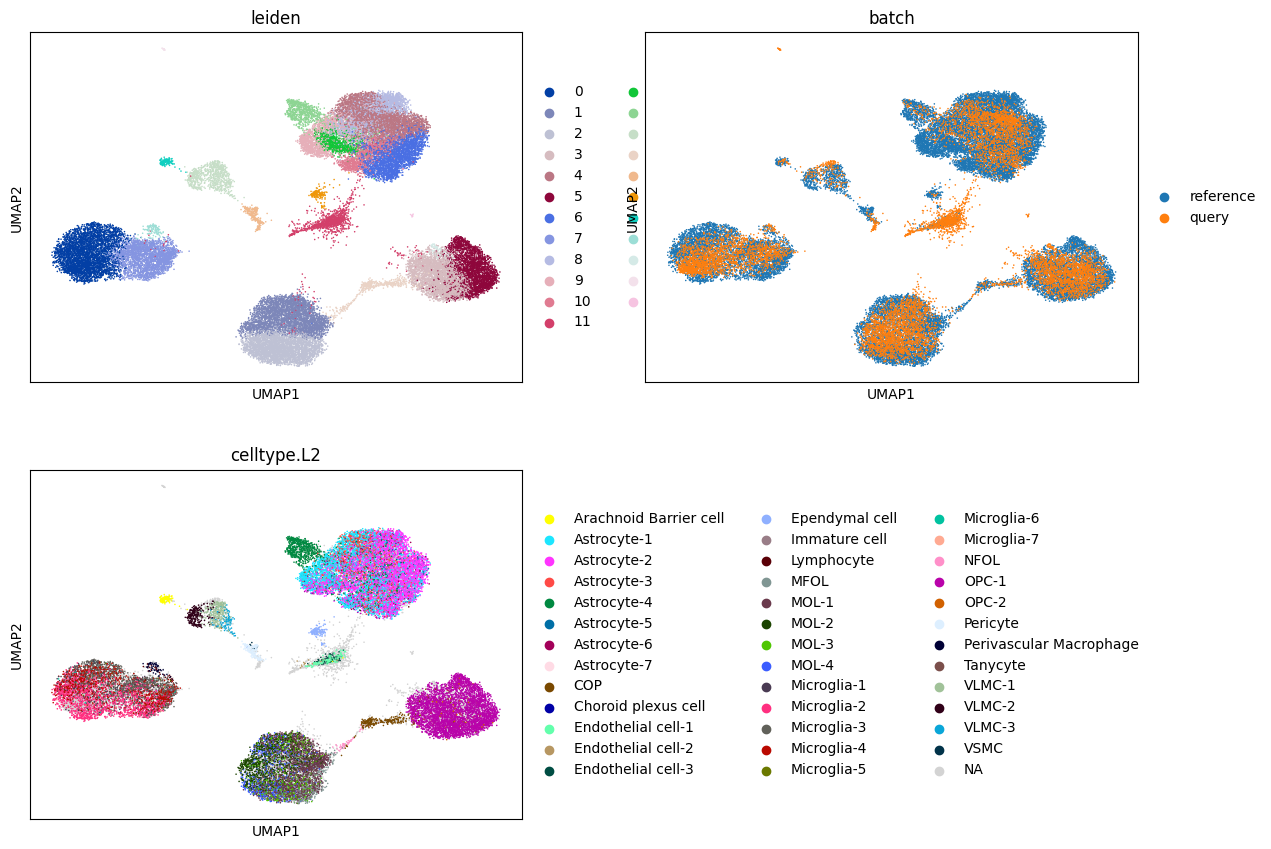

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


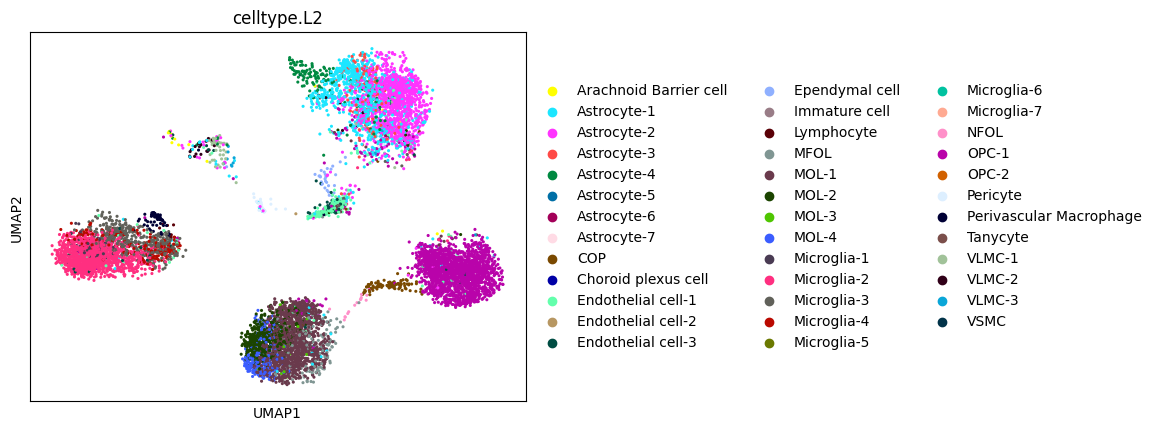

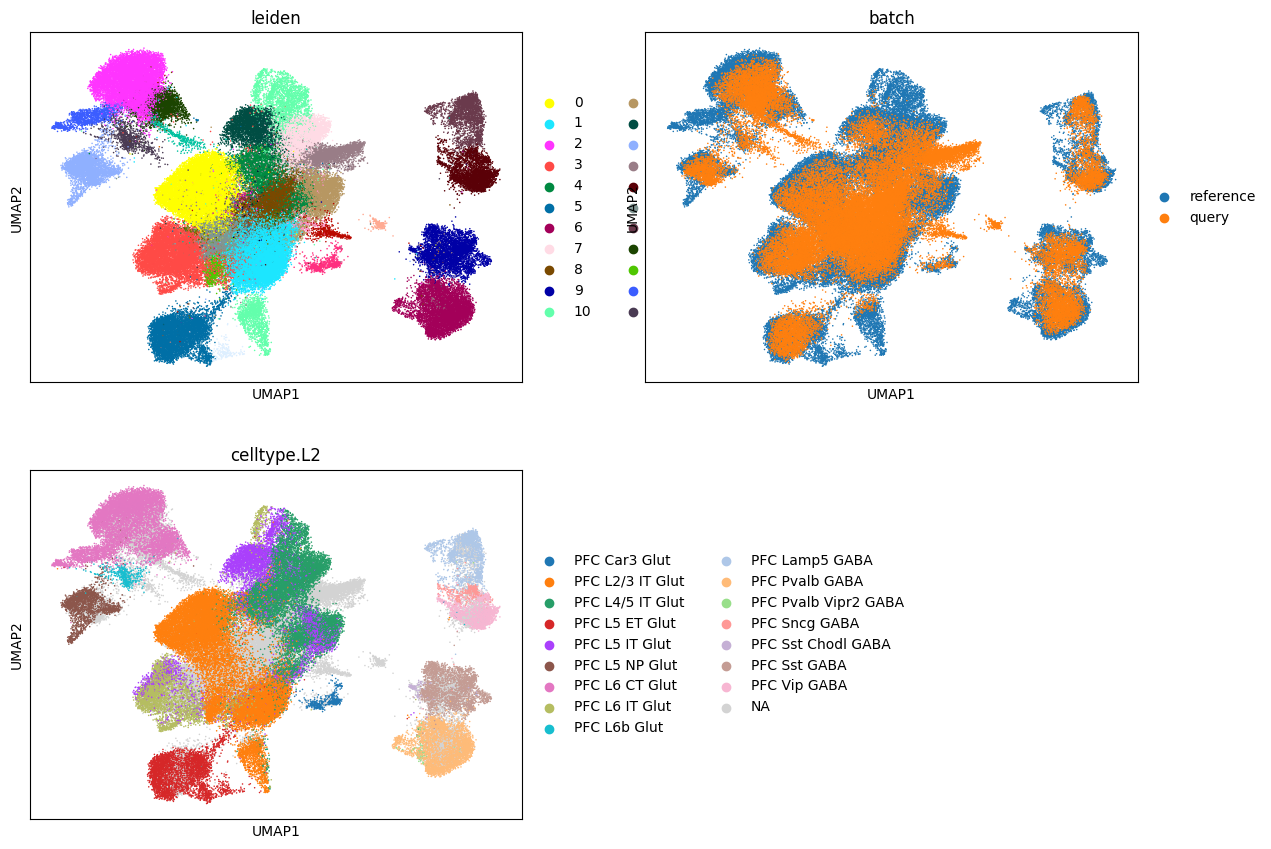

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


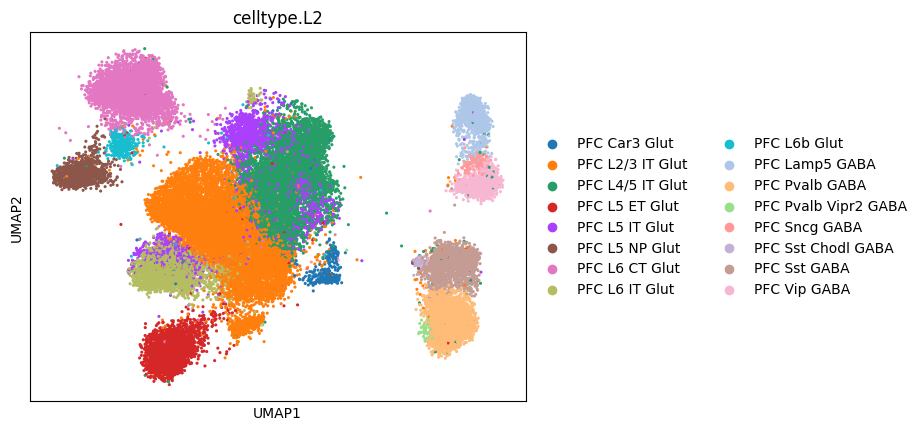

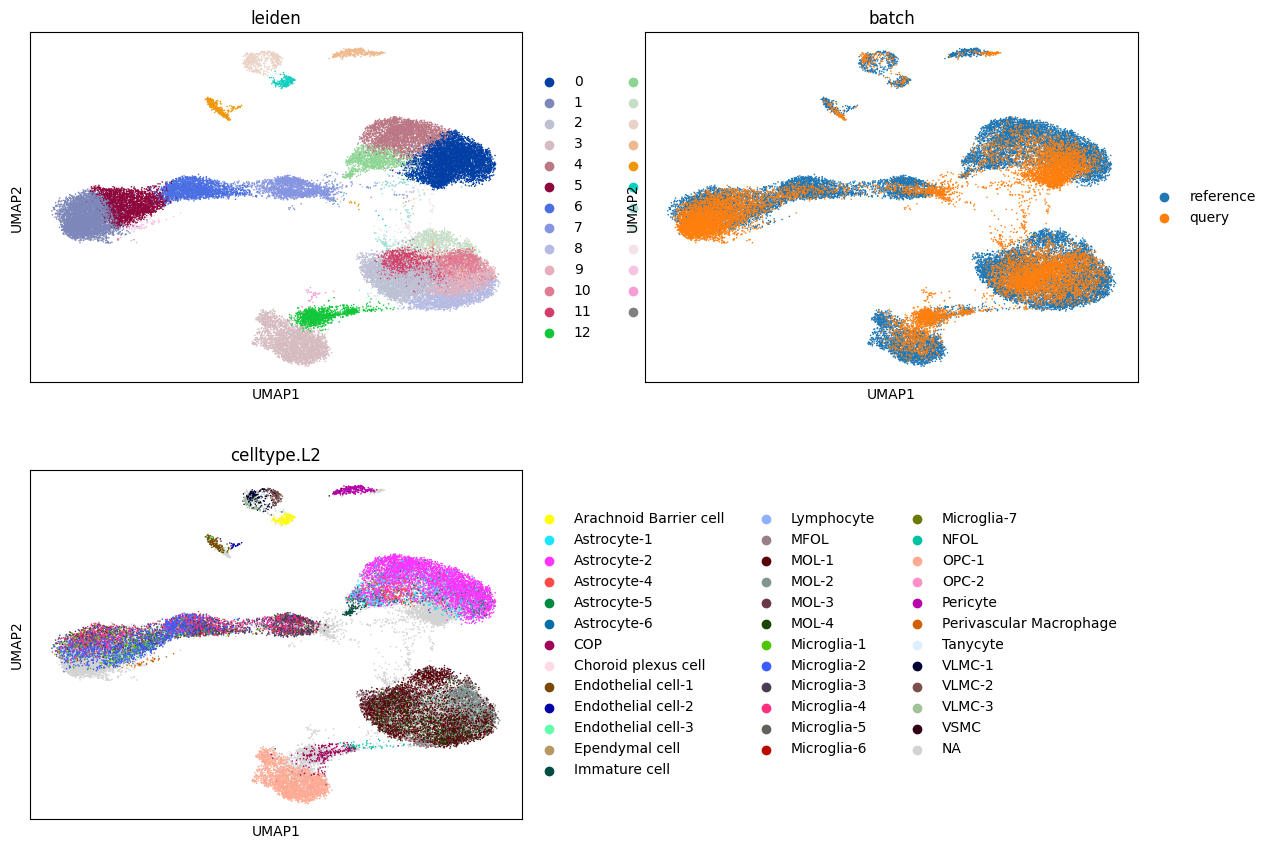

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/_collections_abc.py:991: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]


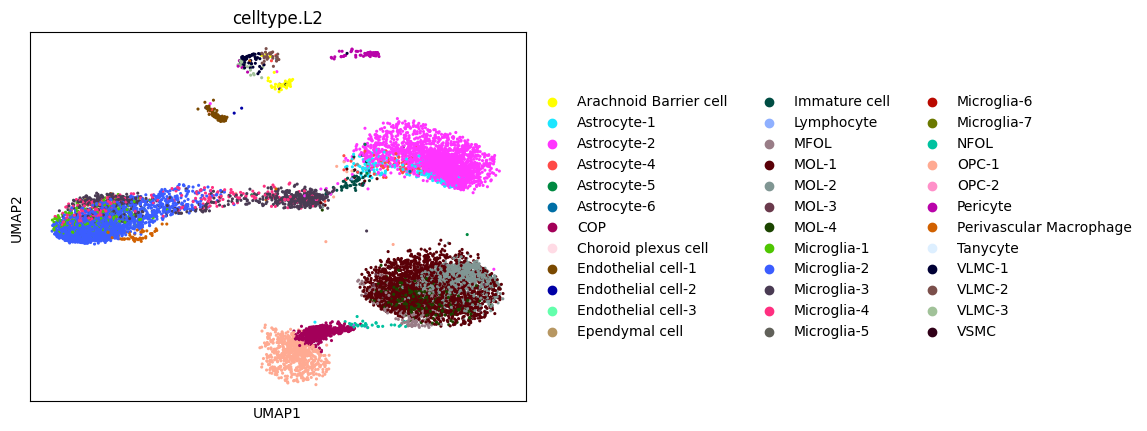

In [12]:
# region = regions[2]
# celltype = celltypes[2]
import os
overwrite = False
for region in regions:
    for celltype in celltypes:

        if os.path.exists(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.h5ad") and not overwrite:
            print(f"File ATACSC_{region}_{celltype}_L2annoated.h5ad already exists, skipping...")
            continue

        adata = sc.read_h5ad(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}.h5ad")
        sc.pl.umap(adata, color=['leiden','batch',"celltype.L2"],size=5,ncols=2,save=f"ATACSC_{region}_{celltype}_umap.svg")
        adata.obsm['X_pca_raw'] = adata.obsm['X_pca']
        adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
        query = adata[(adata.obs.batch=='query')]
        #refernce = adata[(adata.obs.batch=='reference') & (~adata.obs['celltype.L2'].isin(['Doublet','Not sure']))]
        ref = adata[(adata.obs.batch=='reference')].copy()
        sc.tl.ingest(query,ref, obs='celltype.L2', embedding_method='umap')
        sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2,save=f"ATACSC_{region}_{celltype}_L2annoated.svg")
        query.write_h5ad(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.h5ad")
        query.obs.to_csv(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.csv")
        # df_region_marker = df_marker[df_marker['region'] == region]
        # marker_genes_dict = dict(zip(df_region_marker['celltype.L2'],df_region_marker['marker']))
        # for key in marker_genes_dict.keys():
        #     item = marker_genes_dict[key]
        #     llist_item = item.split(" ")
        #     available_list = []

        #     for list_item in llist_item:
        #         if list_item in query.var_names:
        #             available_list.append(list_item)
        #         else:
        #             print(f"{list_item} not in query var names")
        #     marker_genes_dict[key] = available_list

        # sc.pl.dotplot(query, marker_genes_dict, "celltype.L2", dendrogram=False)


In [4]:
dict_h5ad ={}
for region in regions:
    for celltype in celltypes:
        # adata = sc.read_h5ad(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}.h5ad")
        # sc.pl.umap(adata, color=['leiden','batch',"celltype.L2"],size=5,ncols=2)
        # adata.obsm['X_pca_raw'] = adata.obsm['X_pca']
        # adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
        # query = adata[(adata.obs.batch=='query')]
        # #refernce = adata[(adata.obs.batch=='reference') & (~adata.obs['celltype.L2'].isin(['Doublet','Not sure']))]
        # ref = adata[(adata.obs.batch=='reference')].copy()
        # sc.tl.ingest(query,ref, obs='celltype.L2', embedding_method='umap')
        # sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2)
        query=sc.read_h5ad(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.h5ad")
        dict_h5ad[f"{region}_{celltype}"] = query
        # query.obs.to_csv(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}_L2annoated.csv")
        # df_region_marker = df_marker[df_marker['region'] == region]
        # marker_genes_dict = dict(zip(df_region_marker['celltype.L2'],df_region_marker['marker']))
        # for key in marker_genes_dict.keys():
        #     item = marker_genes_dict[key]
        #     llist_item = item.split(" ")
        #     available_list = []

        #     for list_item in llist_item:
        #         if list_item in query.var_names:
        #             available_list.append(list_item)
        #         else:
        #             print(f"{list_item} not in query var names")
        #     marker_genes_dict[key] = available_list

        # sc.pl.dotplot(query, marker_genes_dict, "celltype.L2", dendrogram=False)


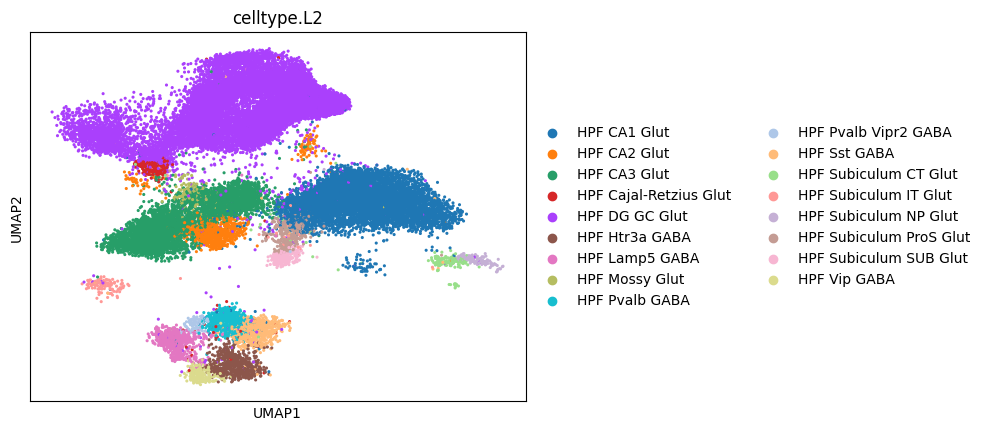

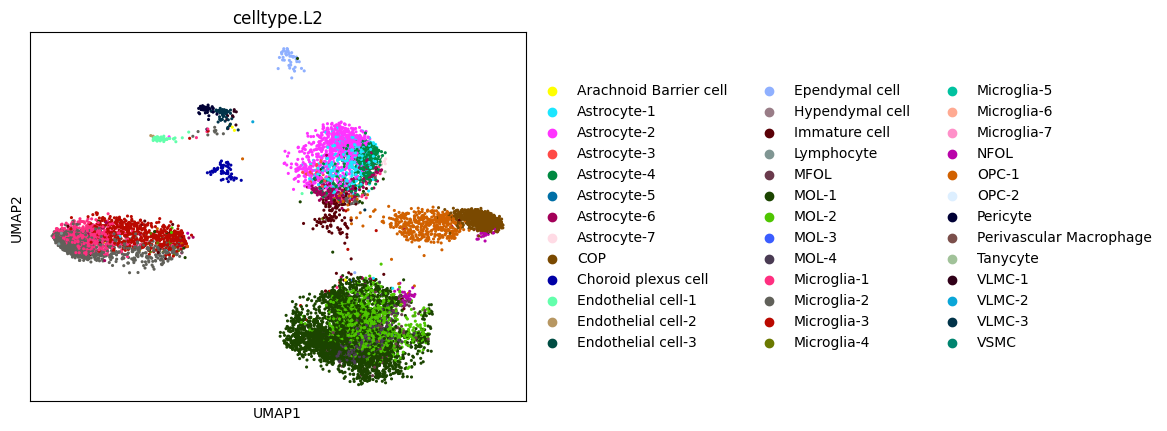

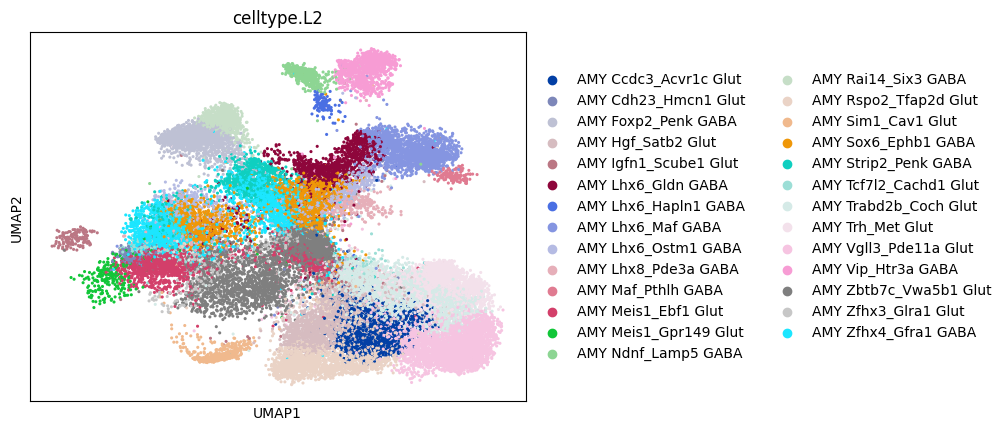

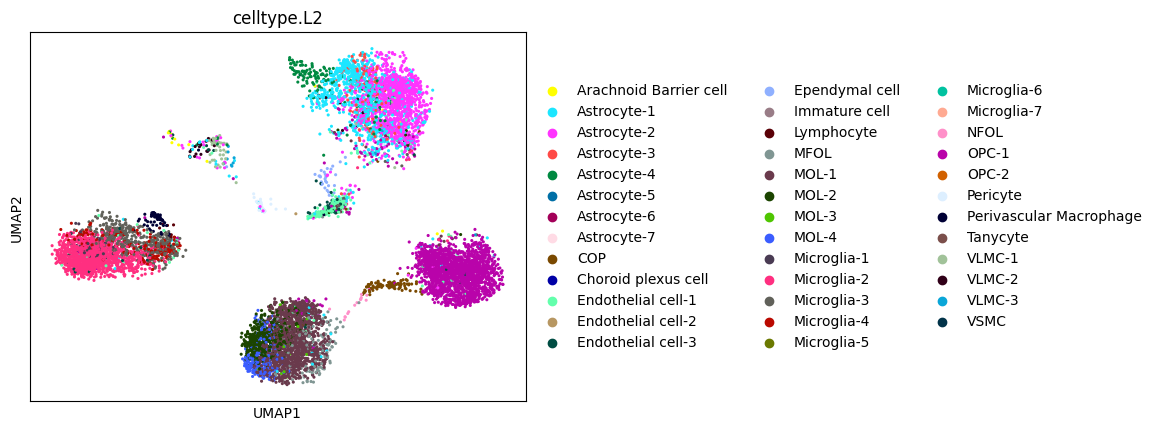

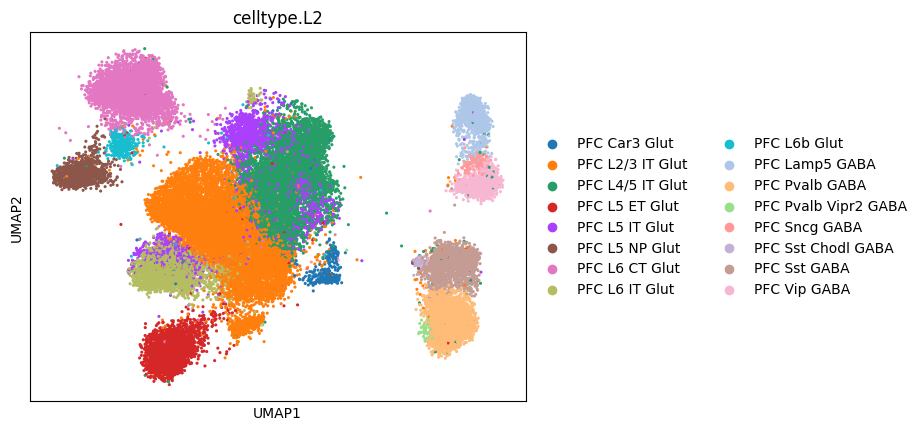

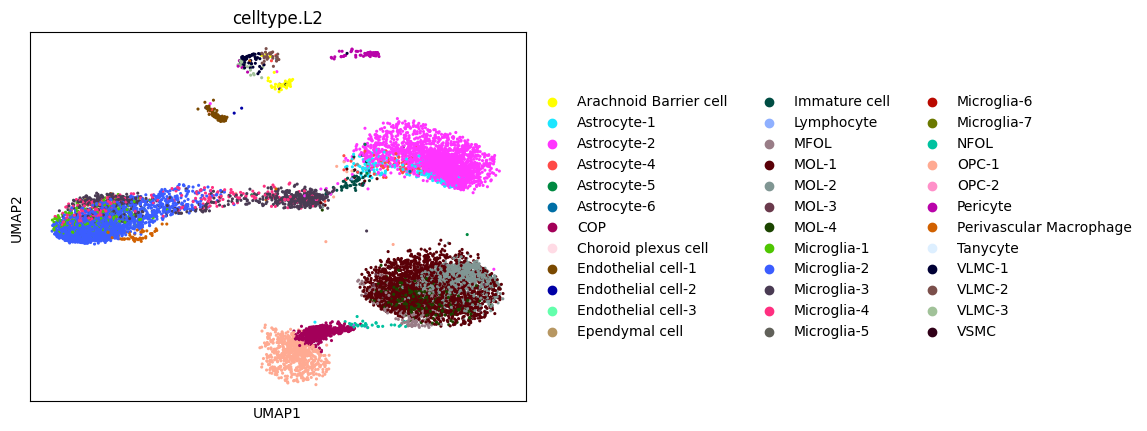

In [5]:
        
for keys in dict_h5ad.keys():
    query = dict_h5ad[keys]
    # sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2)
    # query.write_h5ad(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}_L2annoated.h5ad")
    # query.obs.to_csv(f"/data2st1/junyi/output/atac0416/ATACSC_{region}_{celltype}_L2annoated.csv")
    # df_region_marker = df_marker[df_marker['region'] == region]
    # marker_genes_dict = dict(zip(df_region_marker['celltype.L2'],df_region_marker['marker']))
    # for key in marker_genes_dict.keys():
    #     item = marker_genes_dict[key]
    #     llist_item = item.split(" ")
    #     available_list = []

    #     for list_item in llist_item:
    #         if list_item in query.var_names:
    #             available_list.append(list_item)
    #         else:
    #             print(f"{list_item} not in query var names")
    #     marker_genes_dict[key] = available_list

    # sc.pl.dotplot(query, marker_genes_dict, "celltype.L2", dendrogram=False)
    sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2)


In [ ]:
# region = regions[2]
# celltype = celltypes[2]
import os
overwrite = False
for region in regions:
    for celltype in celltypes:

        if os.path.exists(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.h5ad") and not overwrite:
            print(f"File ATACSC_{region}_{celltype}_L2annoated.h5ad already exists, skipping...")
            continue

        adata = sc.read_h5ad(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}.h5ad")
        sc.pl.umap(adata, color=['batch',"celltype.L2"],size=5,ncols=2,save=f"ATACSC_{region}_{celltype}_umap.svg")
        adata.obsm['X_pca_raw'] = adata.obsm['X_pca']
        adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
        # query = adata[(adata.obs.batch=='query')]
        # #refernce = adata[(adata.obs.batch=='reference') & (~adata.obs['celltype.L2'].isin(['Doublet','Not sure']))]
        # ref = adata[(adata.obs.batch=='reference')].copy()
        # sc.tl.ingest(query,ref, obs='celltype.L2', embedding_method='umap')
        sc.pl.umap(query, color=["celltype.L2"],size=20,ncols=2,save=f"ATACSC_{region}_{celltype}_L2annoated.svg")
        # query.write_h5ad(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.h5ad")
        # query.obs.to_csv(f"/data2st1/junyi/output/atac0627/ATACSC_{region}_{celltype}_L2annoated.csv")
        # df_region_marker = df_marker[df_marker['region'] == region]